# To predict diabetes using PIMA diabetes data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Preprocessing

In [6]:
# check if any null value is present
df.isnull().values.any()

False

## Check how many other missing(zero) values

In [7]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


### Missing values imputation

In [8]:
num_cols = ['Glucose' , 'BloodPressure' , 'SkinThickness', 'Insulin' , 'BMI' ,  'DiabetesPedigreeFunction' ,'Age']

In [9]:
for i in  num_cols:
    df[i].replace(0 , df[i].mean(),inplace=True)
    
        

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [12]:
print('outcome = 0 :' , df[df['Outcome']==0]['Age'].mean())
print('outcome = 1 :' , df[df['Outcome']==1]['Age'].mean())

outcome = 0 : 31.19
outcome = 1 : 37.06716417910448


In [13]:
df.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


In [14]:
### patients with high glucose and insulin level are affected by diabetes

In [15]:
len(df[(df['Outcome']==1) & (df['Pregnancies'] ==4) ])

23

In [16]:
df.groupby(['Outcome' , 'Pregnancies']).size()

Outcome  Pregnancies
0        0               73
         1              106
         2               84
         3               48
         4               45
         5               36
         6               34
         7               20
         8               16
         9               10
         10              14
         11               4
         12               5
         13               5
1        0               38
         1               29
         2               19
         3               27
         4               23
         5               21
         6               16
         7               25
         8               22
         9               18
         10              10
         11               7
         12               4
         13               5
         14               2
         15               1
         17               1
dtype: int64

In [17]:
df.groupby(['Outcome' , 'Pregnancies']).count()

Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome Pregnancies                                                        
0       0                 73             73             73       73   73   
        1                106            106            106      106  106   
        2                 84             84             84       84   84   
        3                 48             48             48       48   48   
        4                 45             45             45       45   45   
        5                 36             36             36       36   36   
        6                 34             34             34       34   34   
        7                 20             20             20       20   20   
        8                 16             16             16       16   16   
        9                 10             10             10       10   10   
        10                14             14             14       14   14   
        11                 4              4              4        4    4   
        12                 5              5              5        5    5   
        13                 5              5              5        5    5   
1       0                 38             38             38       38   38   
        1                 29             29             29       29   29   
        2                 19             19             19       19   19   
        3                 27             27             27       27   27   
        4                 23             23             23       23   23   
        5                 21             21             21       21   21   
        6                 16             16             16       16   16   
        7                 25             25             25       25   25   
        8                 22             22             22       22   22   
        9                 18             18             18       18   18   
        10                10             10             10       10   10   
        11                 7              7              7        7    7   
        12                 4              4              4        4    4   
        13                 5              5              5        5    5   
        14                 2              2              2        2    2   
        15                 1              1              1        1    1   
        17                 1              1              1        1    1   

                     DiabetesPedigreeFunction  Age  
Outcome Pregnancies                                 
0       0                                  73   73  
        1                                 106  106  
        2                                  84   84  
        3                                  48   48  
        4                                  45   45  
        5                                  36   36  
        6                                  34   34  
        7                                  20   20  
        8                                  16   16  
        9                                  10   10  
        10                                 14   14  
        11                                  4    4  
        12                                  5    5  
        13                                  5    5  
1       0                                  38   38  
        1                                  29   29  
        2                                  19   19  
        3                                  27   27  
        4                                  23   23  
        5                                  21   21  
        6                                  16   16  
        7                                  25   25  
        8                                  22   22  
        9                                  18   18  
        10                                 10   10  
        11                                  7    7  
        12                  

### No  outliers because it's a classification problem 

### Exploratory Data Analysis

In [18]:
## checking the distribution of numerical variables for people who has diabetes

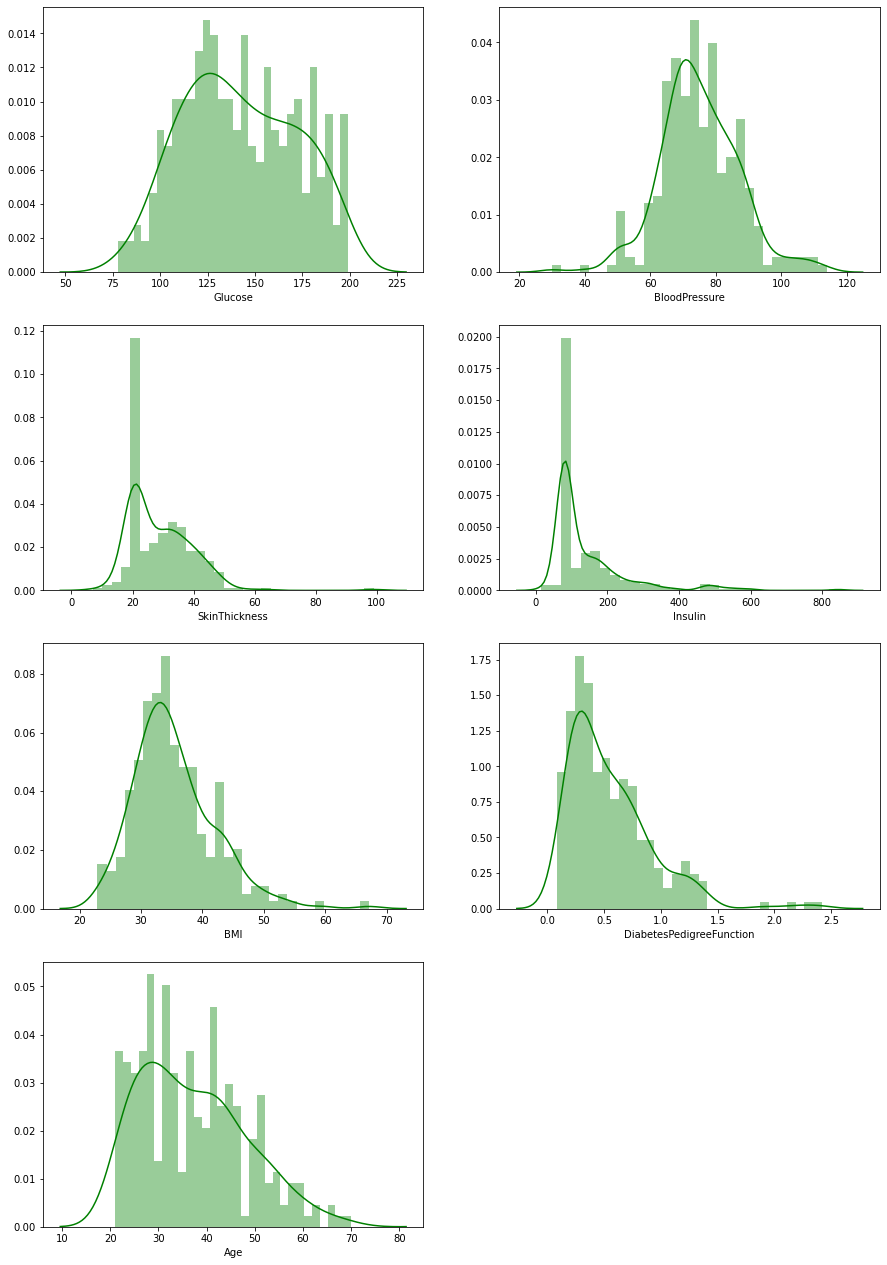

In [19]:
plt.figure(figsize=(15,40))
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(7,2,plotnumber)
    sns.distplot(df[(df['Outcome']== 1)][numerical_feature] , bins =30 , label = 'Yes' , color = 'green' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [20]:
## checking the distribution of numerical variables for people who doesn't have diabetes

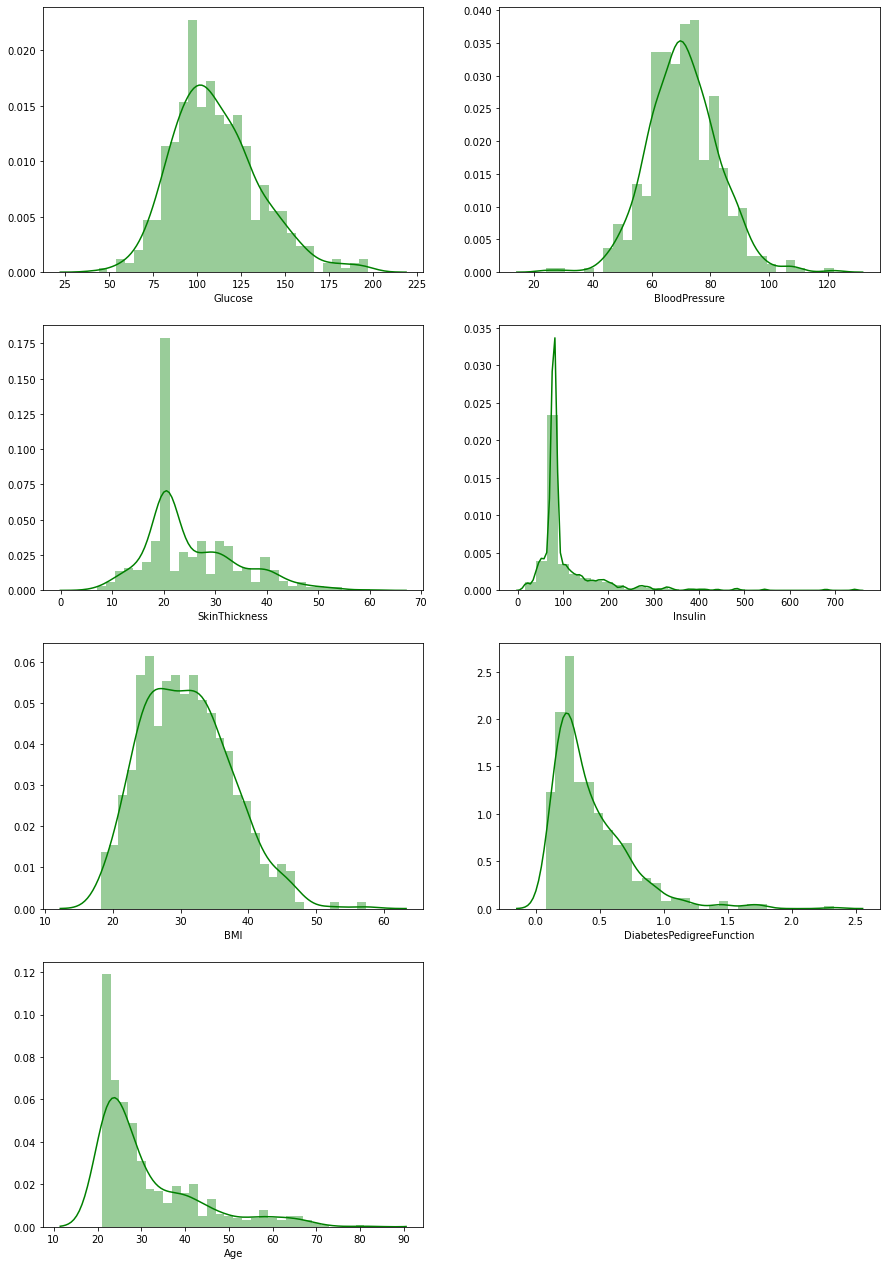

In [21]:
plt.figure(figsize=(15,40))
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(7,2,plotnumber)
    sns.distplot(df[(df['Outcome']== 0)][numerical_feature] , bins =30 , label = 'Yes' , color = 'green' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [22]:
### total distribution

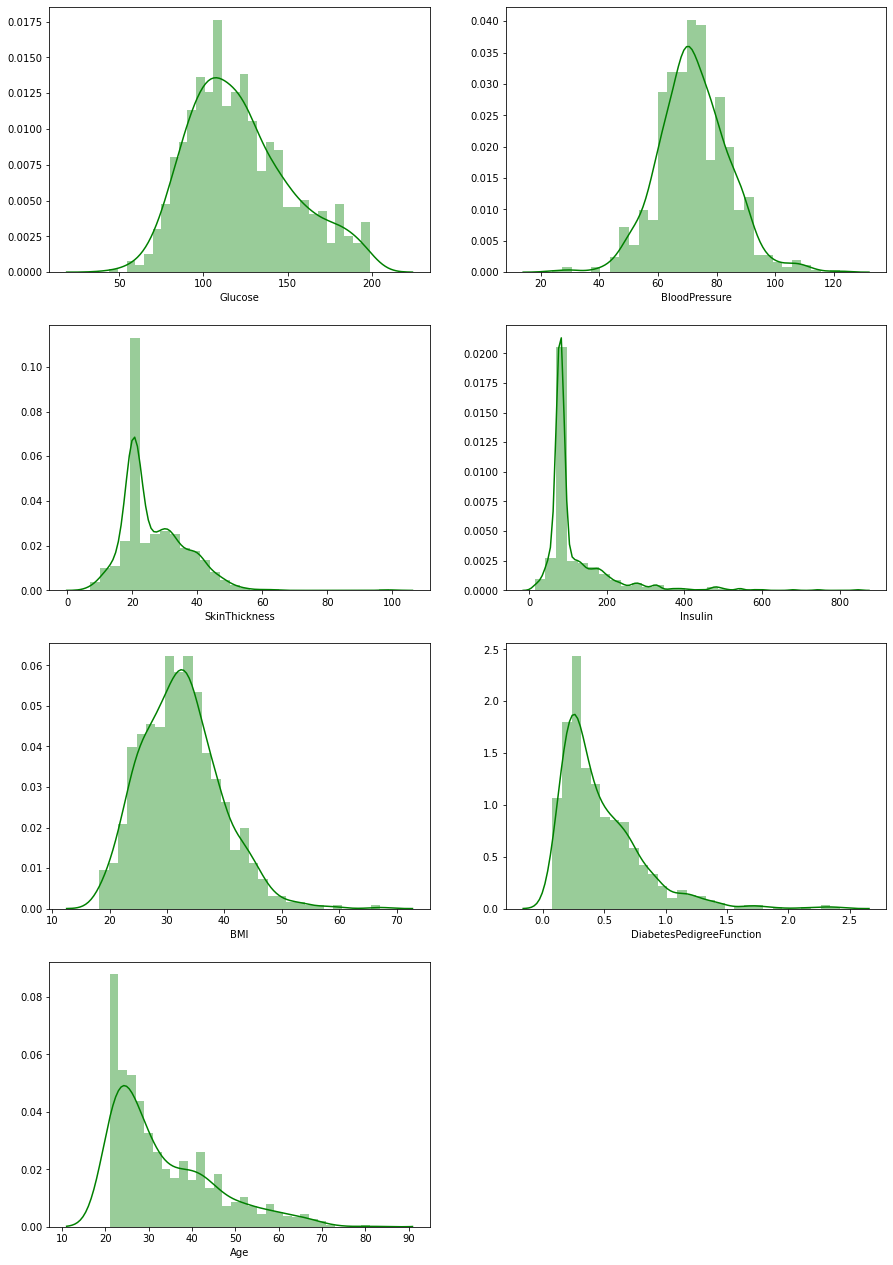

In [23]:
plt.figure(figsize=(15,40))
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(7,2,plotnumber)
    sns.distplot(df[numerical_feature] , bins =30 , label = 'Yes' , color = 'green' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [24]:
## Pair plot

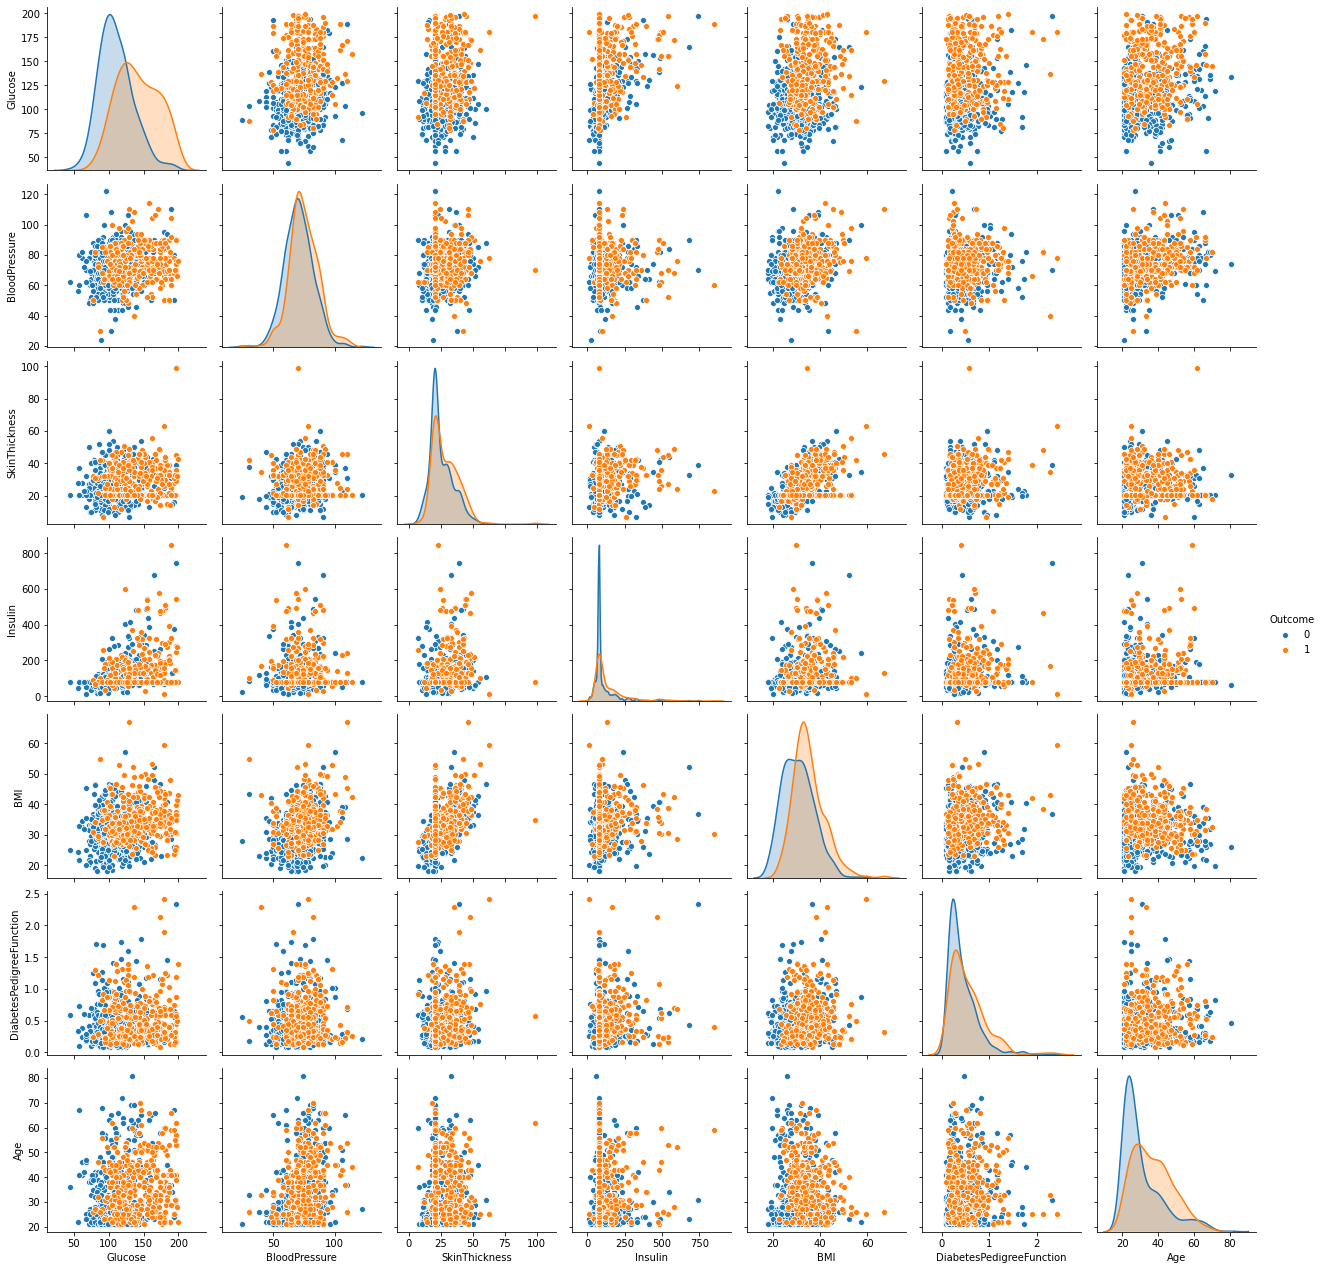

In [25]:
sns.pairplot(df,hue='Outcome',vars=['Glucose' , 'BloodPressure' , 'SkinThickness', 'Insulin' , 'BMI' ,  'DiabetesPedigreeFunction' ,'Age'])

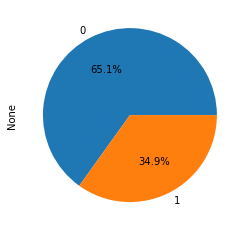

In [26]:
df.groupby('Outcome').size().plot(kind='pie', autopct='%.1f%%')

In [27]:
## It is a balanced dataset

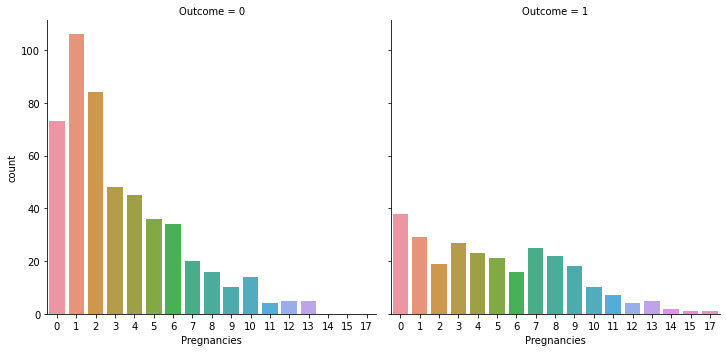

In [28]:
sns.catplot(x='Pregnancies' , col= 'Outcome' , kind= 'count' , data = df)

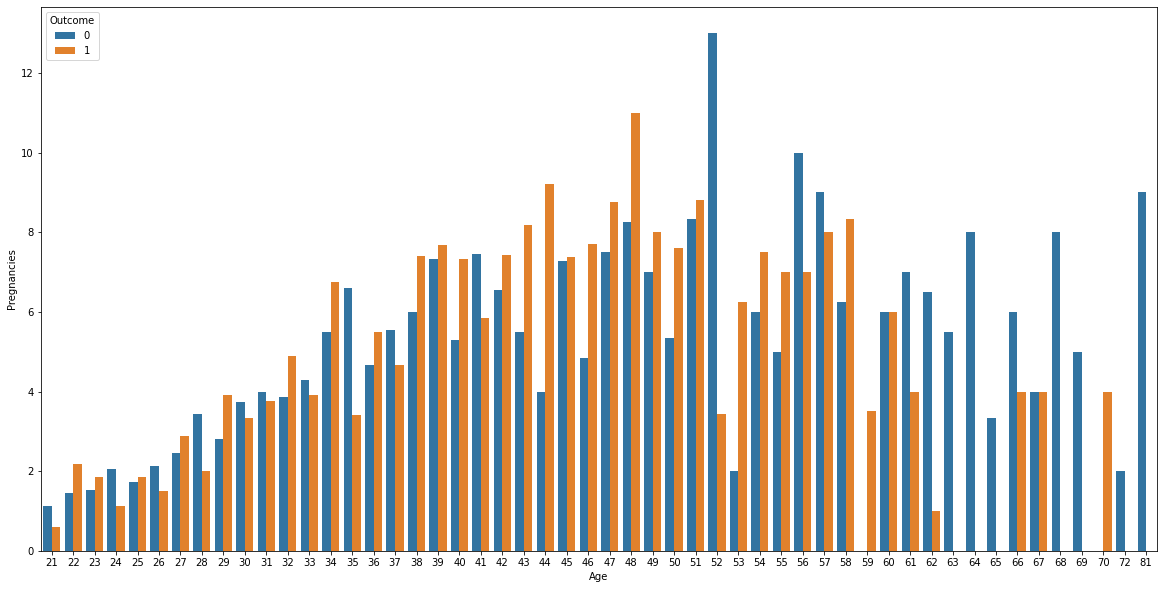

In [29]:
plt.figure(figsize = ( 20,10))
sns.barplot(x= 'Age' , y= 'Pregnancies' , hue='Outcome' , data = df , ci = None)

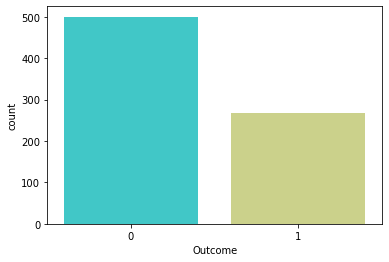

In [30]:
sns.countplot(x='Outcome',data=df , palette = 'rainbow')

## Correlation plot

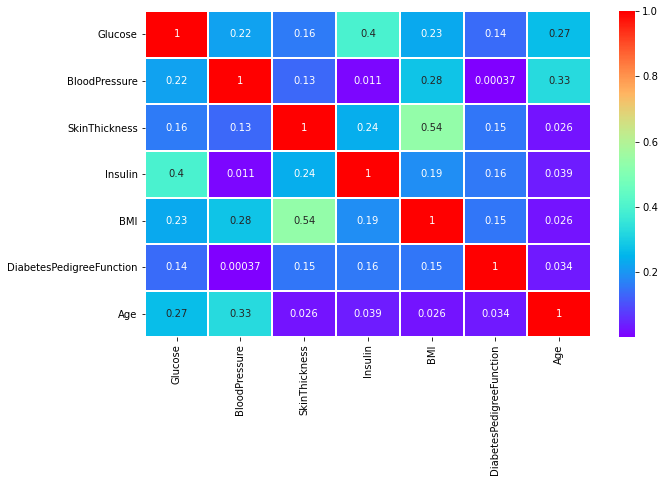

In [31]:
plt.figure(figsize = (10 ,6))
sns.heatmap(df[num_cols].corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

In [32]:
df[num_cols].corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
BloodPressure,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
SkinThickness,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
Insulin,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
BMI,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
Age,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


In [33]:
### here the numerical variables are not having correlation among themselves

### TRAIN TEST SPLIT

In [34]:
x = df.drop('Outcome' , axis = 1)
y = df['Outcome']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Model Building

## RandomForestClassifier

In [36]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [37]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.758


Text(0.5, 15.0, 'predicted label')

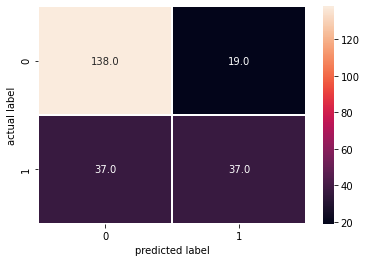

In [38]:
sns.heatmap(metrics.confusion_matrix(y_test , predict_train_data ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Hyper Parameter Optimization with xgboost

In [39]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [40]:
## using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [41]:
classifier=xgboost.XGBClassifier()

In [42]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [44]:
random_search.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[14:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_test,y_test.ravel(),cv=10)

[14:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [49]:
score

array([0.875     , 0.69565217, 0.7826087 , 0.73913043, 0.7826087 ,
       0.73913043, 0.7826087 , 0.69565217, 0.69565217, 0.60869565])

In [50]:
score.mean()

0.7396739130434782

Text(0.5, 15.0, 'predicted label')

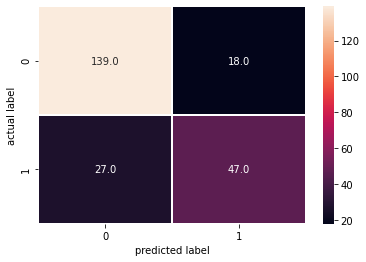

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test , random_search.predict(x_test) ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Conclusion

### XGBoost predicts  less number of  false negative values hence this model can be preferred over RandomForest
